<a href="https://colab.research.google.com/github/TheAmirHK/Financial_time_series/blob/main/Stock%20price%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
from datetime import datetime, date, timedelta
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from pandas import Series

# For warnings suppression
import warnings
warnings.filterwarnings("ignore")

In [3]:
# The stocks to be analyzed !
stocks = ["MRNA","GOOG", "META", "AAPL", "COST"]
market = ['^GSPC'] # S&P500 index
# define the number of year to be studied
NYears = 3

# Define the time period of study
end = datetime.today()
start = end - timedelta(days = NYears*365)
print(end, start)

2023-11-22 22:22:50.794103 2020-11-22 22:22:50.794103


In [ ]:
def recive_data(tickers, start, end):
    adj_close_df = pd.DataFrame()

    for ticker in tickers:
        data = pdr.get_data_yahoo(ticker, start, end)
        adj_close_df[ticker] = data["Adj Close"]

    return adj_close_df

stock_data = recive_data(stocks, start, end)
market_data = recive_data(market, start, end)
stock_market_data = stock_data.assign( GSPC = market_data['^GSPC'])



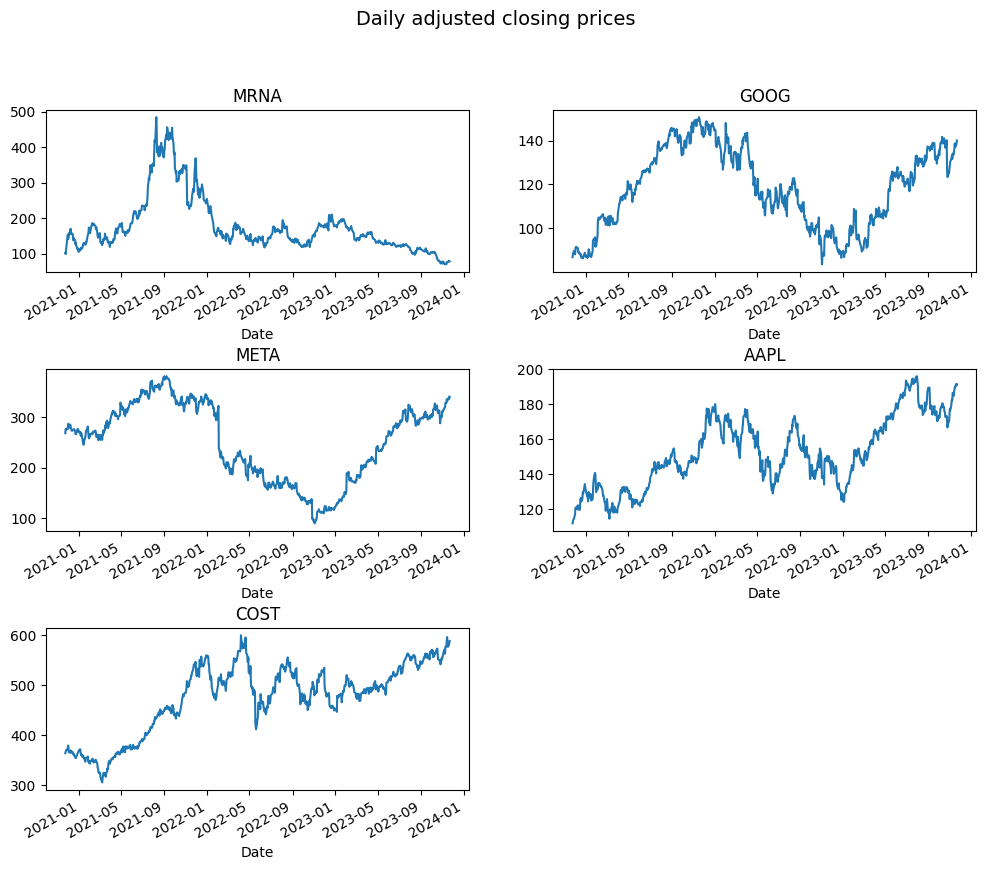

In [7]:
# Plot stocks daily prices
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.6)
plt.suptitle("Daily adjusted closing prices", fontsize=14)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(stocks):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
    stock_data[ticker].plot(ax=ax)
    # chart formatting
    ax.set_title(ticker.upper())
    ax.set_xlabel("Date")

In [ ]:
def log_return(data):
    return data.pct_change().dropna()

log_stock_data = log_return(stock_data)
log_market_data = log_return(market_data)
log_stock_market_data = log_return( stock_market_data)

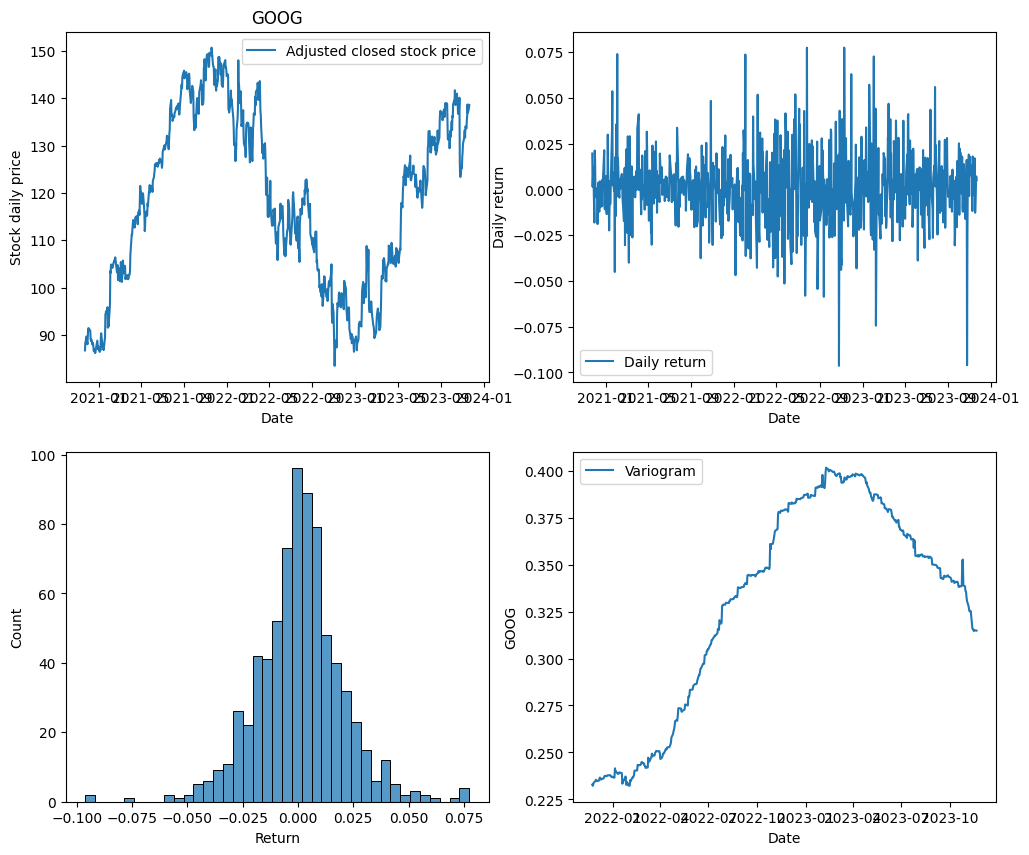

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

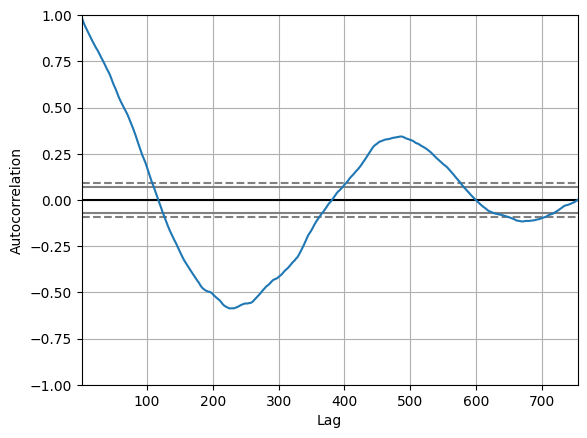

In [ ]:
# plot stock price and variogram
def plot_daily_change(ticker):
    data = pd.DataFrame()
    data['Stock price'] = stock_market_data[ticker]
    data['Daily return'] = log_stock_market_data[ticker]
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

  # Plot daily stock price
    fig1 = plt.figure("Price")
    fig1 = sns.lineplot(stock_market_data[ticker], label = "Adjusted closed stock price", ax = axs[0,0])
    fig1.set(xlabel ="Date", ylabel = "Stock daily price", title =ticker)

  # Plot daliy log return
    fig2 = plt.figure("Daily return")
    fig2 = sns.lineplot(log_stock_market_data[ticker], label = 'Daily return', ax = axs[0,1])
    fig2.set(xlabel ="Date", ylabel = "Daily return")

  # Hisplot daily return
    fig3 = plt.figure("Daily return")
    fig3 = sns.histplot(log_stock_market_data[ticker], label = 'Daily return distribution', ax = axs[1,0])
    fig3.set(xlabel ="Return")

  # Plot daility volatility
    daily_change = (log_stock_market_data.rolling(window=252).std()*np.sqrt(252)).dropna()
    data['Daily volatility'] = daily_change[ticker]
    fig4 = plt.figure("Variogram")
    sns.lineplot(daily_change[ticker], label = 'Variogram', ax = axs[1,1])

  # Plot autocorrelation for white noise
    fig5 = plt.figure("Autocorrelation")
    dataser = Series(data['Stock price'])
    fig5 = autocorrelation_plot(dataser)

    return

plot_daily_change("GOOG")

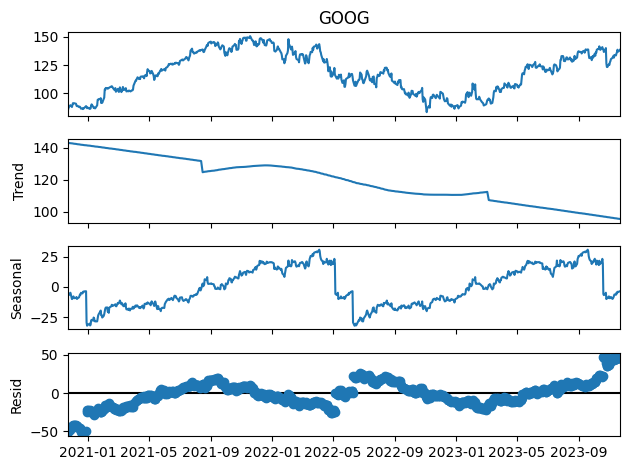

In [ ]:
# Time series decomposition on the Adjusted price of a stock
from statsmodels.tsa.seasonal import seasonal_decompose
""" Note: In seasonal_decompose two models can be appleid namely, additive model and multiplicative model.
More specifacly, the additive model represenst a time series as a sum of three components Y[t] = T[t] + S[t] + e[t]
where T[t] is trend, S[t] represents the periodic (seasonal) component, and e[t] illustrates random residuals/ noises.
On the other hand, the multiplicative model represents nonlinear beahavior of the serie where Y[t] = T[t] * S[t] * e[t]"""

def TSD (input_price, ticker, model):
  # model =  "additive"  or "multiplicative"
    data = pd.DataFrame()
    data[ticker] = input_price[ticker]
    decompose = seasonal_decompose(data[ticker], model=model, period=int(365), extrapolate_trend='freq')
    decompose.plot()
    plt.show()

    return decompose

TSD(stock_data, "GOOG", "additive")